# Discussion 1: Linear Regression

**TO FILL IN :**


#### About the data: 

#### Purpose: 


## Data Loading

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
from IPython.display import display, clear_output

# Load the data
file_path = 'data/Hurricane_Irene_Hudson_River.xlsx'
do_data = pd.read_excel('data/Hurricane_Irene_Hudson_River.xlsx', sheet_name = 5).drop(['Piermont D.O. (ppm)'], axis = 1)
rainfall_data = pd.read_excel(file_path, sheet_name='Rainfall').drop(['Piermont  Rainfall Daily Accumulation (Inches)'], axis = 1)
turbidity_data = pd.read_excel(file_path, sheet_name='Turbidity').drop(['Piermont Turbidity in NTU'], axis = 1)



## Data Cleaning

Since we read in our data through multiple excel sheets, we need to merge our different dataframes. The different data sheets all have a column for date, so we can merge our data on this. To better call on the data in our analysis, we can change the column names. Finally, we will update the date to be of datetime type, and set the date as the index. 

In [31]:
# Merge the two datasets

data = do_data.merge(rainfall_data, on = "Date Time (ET)")
data = data.merge(turbidity_data, on = "Date Time (ET)")
data.head()

# Update the column names 
data.columns = ['date', 'albany_do', 'norrie_do', 'albany_rainfall', 'norrie_rainfall', 'albany_turbidity', 'norrie_turbidity']
data.head()

# Convert data to datetime format and set it as index
data['date'] = pd.to_datetime(data['date'])

# Set the date as the index
data.set_index('date', inplace = True)

data.head()

data.to_csv('merged_data.csv')

## Muliple Linear Regression

Now that our data is cleaned, we can start our multiple linear regression. We will be predicting the turbidity at the Albany sample site, with the rainfall and dissolved oxygen at the Albany sample site as our predictors. Let's check if our model improves at all by adding a second predictor. 

RMSE: 220.78193604966114
R-squared: 0.4895023201317559


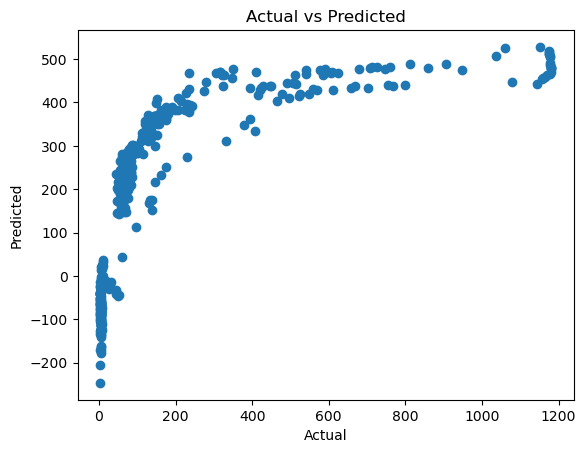

array([-1.32710857e+02,  3.68475892e+02,  4.36850707e+02, -3.30375838e+01,
        3.51416472e+02, -9.85371636e+01,  4.65328785e+02,  4.71024400e+02,
       -1.46845120e+01,  8.47661274e-02,  3.88437974e+02,  3.20090586e+02,
        2.43199775e+02,  2.04399502e+01,  4.11220436e+02,  4.56785361e+02,
        3.79894550e+02, -4.24860863e+01, -8.71459323e+01,  4.36850707e+02,
        2.74525661e+02,  4.31155091e+02,  2.34656351e+02,  2.57438814e+02,
        2.74525661e+02,  3.82742358e+02,  2.31808544e+02, -1.61188936e+02,
        2.16006184e+02, -1.76420239e+01,  4.82415632e+02, -7.29068932e+01,
        4.68176593e+02,  4.56785361e+02,  3.74198935e+02,  2.91612508e+02,
        3.11547162e+02,  4.68176593e+02,  4.76720016e+02,  2.11873889e+02,
        2.94460316e+02,  3.25786202e+02,  1.56449060e+02,  2.37504159e+02,
        2.80221276e+02,  4.19763860e+02, -1.22416692e+02,  5.10893710e+02,
       -7.12932851e+01,  2.26112928e+02,  4.88111247e+02,  3.51389045e+02,
       -9.85371636e+01, -

In [32]:
# Define predictors and the target variable
X = data[['albany_rainfall', 'albany_do']]
y = data['albany_turbidity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict and evaluate
y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


y_pred

## Create a widget to visualize different models

To play around with our model a bit more and visualize different scenarios, we will create a widget using the `ipywidgets` library. 

In [39]:
# Create a widget for selecting predictors
predictor_selector = widgets.SelectMultiple(
    options = data.columns,
    value = [data.columns[3]],
    description = "Predictors"

)


# Create a dropdown for selecting the target variable
target_selector = widgets.Dropdown(
    options = data.columns, 
    value = data.columns[0],
    description = "Target"

)

# Button to evaluate the model
evaluate_button = widgets.Button(description = "Evaluate Model")


# Output widget to display results
output = widgets.Output()

# Define the function to handle button clicks
def evaluate_model(b):
    with output:
        clear_output(wait=True) # Clear output of display area
        
        # Make sure the target is not in the predictors
        selected_predictors = [item for item in predictor_selector.value]
        if target_selector.value in selected_predictors : 
            print("Target variable must not be in the predictors.")
            return
        
        # Prepare the data
        X = data[selected_predictors]
        y = data[target_selector.value]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
        
        
        # Create and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict and calculate R^2 and MSE
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        # Display the R^2 score and MSE
        print(f"R^2: {r2:.4f}")
        print(f"MSE: {mse:.4f}")





# Display the widgets and connect the button to the function
display(predictor_selector, target_selector, evaluate_button, output)
evaluate_button.on_click(evaluate_model)


SelectMultiple(description='Predictors', index=(3,), options=('albany_do', 'norrie_do', 'albany_rainfall', 'no…

Dropdown(description='Target', options=('albany_do', 'norrie_do', 'albany_rainfall', 'norrie_rainfall', 'alban…

Button(description='Evaluate Model', style=ButtonStyle())

Output()